In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Xem thông tin tập dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
#Tính tổng số dòng dữ liệu null
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Xóa tất cả các dòng dữ liệu null
data=data.dropna()

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
#Thông tin data sau khi xóa
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b7a4136ee90>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7a4136f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7a4136ed10>,
 'medians': [<matplotlib.lines.Line2D at 0x7b7a4136f910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b7a4136fbb0>,
 'means': []}

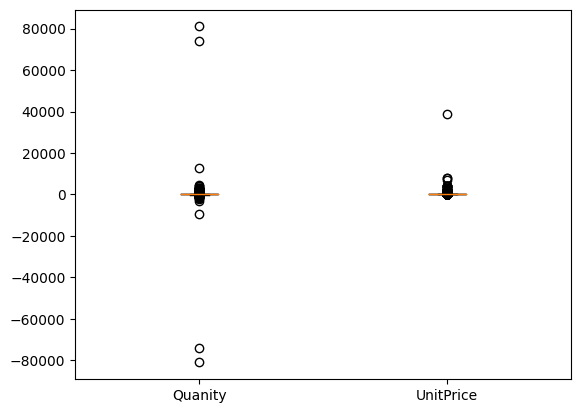

In [11]:
#Mô tả dữ liệu bằng các biểu đồ
plt.boxplot([data['Quantity'], data['UnitPrice']], labels=['Quanity','UnitPrice'], showfliers=True)

In [12]:
#Kiểm tra thử các dữ liệu đặc biệt
outlier1 = data[data['Quantity'] > 60000]
outlier1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [13]:
customer12346 = data[data['CustomerID'] == 12346]
customer12346

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


In [14]:
customer16446 = data[data['CustomerID'] == 16446]
customer16446

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [15]:
unitpriceOutline = data[data['UnitPrice'] > 20000]
unitpriceOutline

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom


In [16]:
quantityAm = data[data['Quantity'] < 0]
quantityAm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [17]:
customer17548 = data[data['CustomerID'] == 17548]
customer17548

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,4/20/2011 12:01,1.65,17548.0,United Kingdom


In [18]:
#Tính toán dữ liệu để đưa ra các trường cần thiết theo RFM
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%m/%d/%Y %H:%M")
maximum = max(data['InvoiceDate'])
maximum = maximum + pd.DateOffset(days = 1)
data['Distance'] = maximum - data['InvoiceDate']

In [19]:
mometary = data.groupby("CustomerID").TotalRevenue.sum()
mometary = mometary.reset_index()

frequency = data.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()

recency = data.groupby("CustomerID").Distance.min()
recency = recency.reset_index()


In [20]:
RFM = mometary.merge(frequency, on = "CustomerID", how="inner")
RFM = RFM.merge(recency, on="CustomerID", how="inner")
RFM.columns = ['CustomerID', 'TotalRevenue', 'Frequency', 'Recency']
RFM.head()

,CustomerID,TotalRevenue,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


In [21]:
#Khám phá dữ liệu RFM sau khi tổng hợp được từ dữ liệu ban đầu
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   CustomerID    4372 non-null   float64        
 1   TotalRevenue  4372 non-null   float64        
 2   Frequency     4372 non-null   int64          
 3   Recency       4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7b7a412ead70>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7a412eb2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7a412eaad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b7a412eb7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b7a412eba90>],
 'means': []}

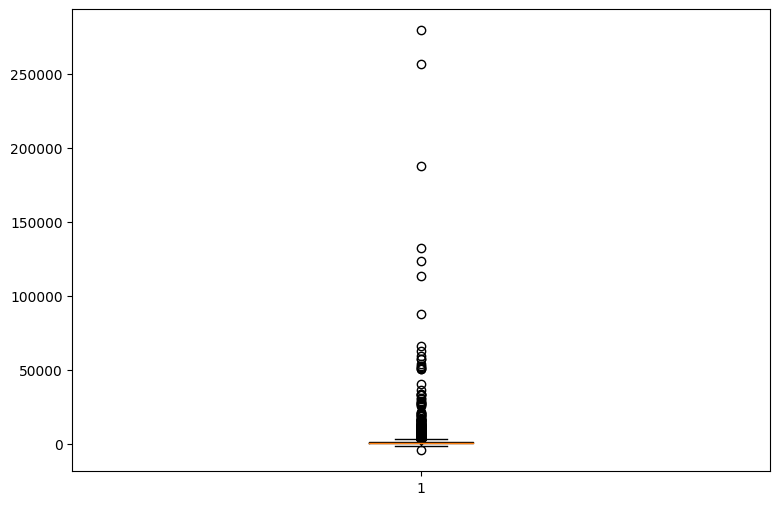

In [22]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(RFM['TotalRevenue'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b7a41201c30>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7a41202170>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7a41201990>],
 'medians': [<matplotlib.lines.Line2D at 0x7b7a412026b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b7a41202980>],
 'means': []}

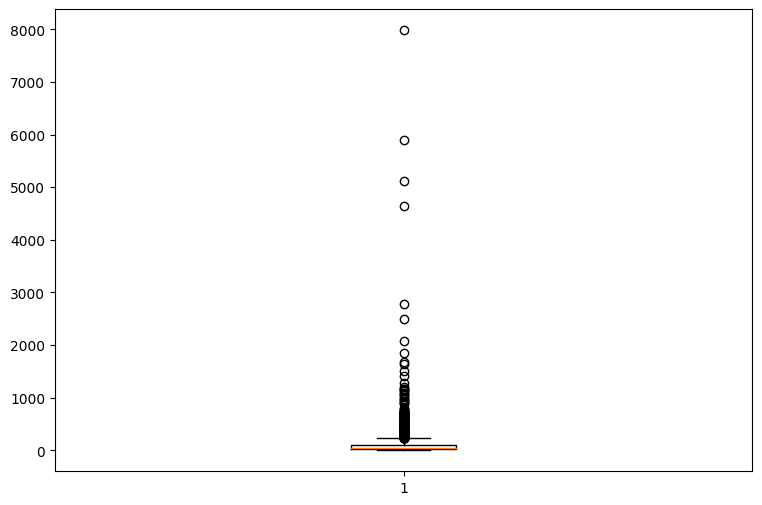

In [23]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(RFM['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b7a4101e380>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7a4101e7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7a4101e0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b7a4101ece0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b7a4101ef80>],
 'means': []}

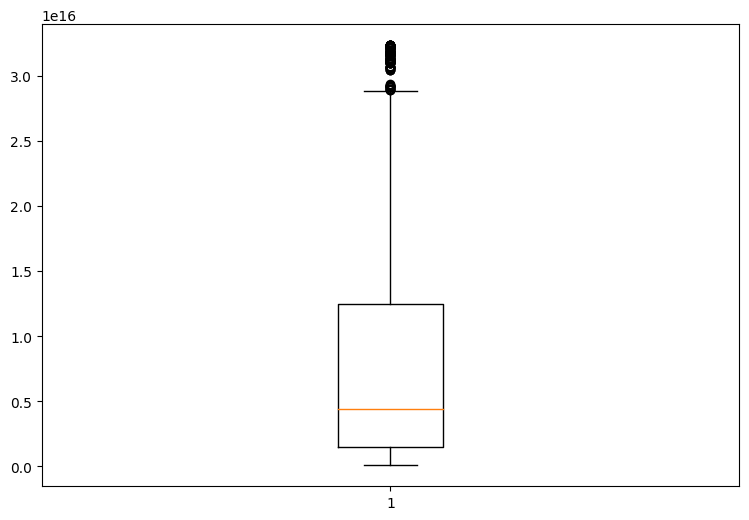

In [24]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(RFM['Recency'])

In [25]:
#Xử lý outlier cho TotalRevenue
Q1 = RFM['TotalRevenue'].quantile(0.25)
Q3 = RFM['TotalRevenue'].quantile(0.75)

IQR = Q3 - Q1
RFM = RFM[(RFM['TotalRevenue'] >= Q1 - 1.5*IQR) & (RFM['TotalRevenue'] <= Q3 + 1.5*IQR)]

In [26]:
#Xử lý outlier cho Frequency
Q1 = RFM['Frequency'].quantile(0.25)
Q3 = RFM['Frequency'].quantile(0.75)

IQR = Q3 - Q1
RFM = RFM[(RFM['Frequency'] >= Q1 - 1.5*IQR) & (RFM['Frequency'] <= Q3 + 1.5*IQR)]

In [27]:
#Xử lý outlier cho Recency
Q1 = RFM['Recency'].quantile(0.25)
Q3 = RFM['Recency'].quantile(0.75)

IQR = Q3 - Q1
RFM = RFM[(RFM['Recency'] >= Q1 - 1.5*IQR) & (RFM['Recency'] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7b7a40f32f20>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7a40f33460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7a40f32c80>],
 'medians': [<matplotlib.lines.Line2D at 0x7b7a40f339a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b7a40f33c40>],
 'means': []}

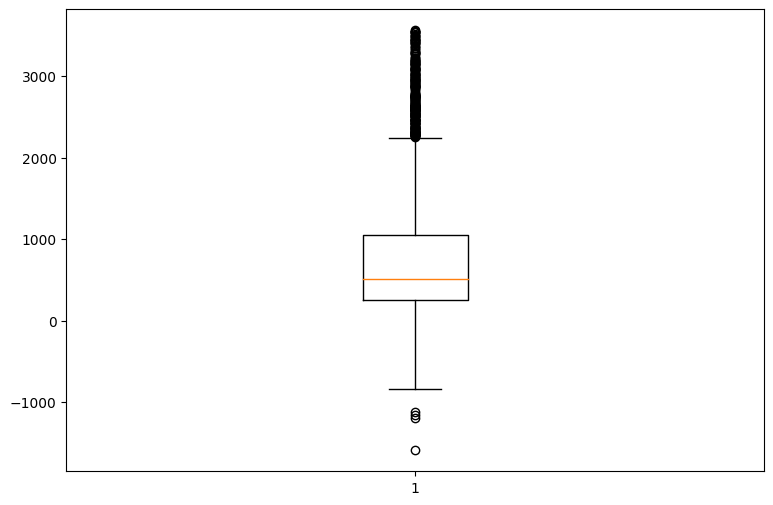

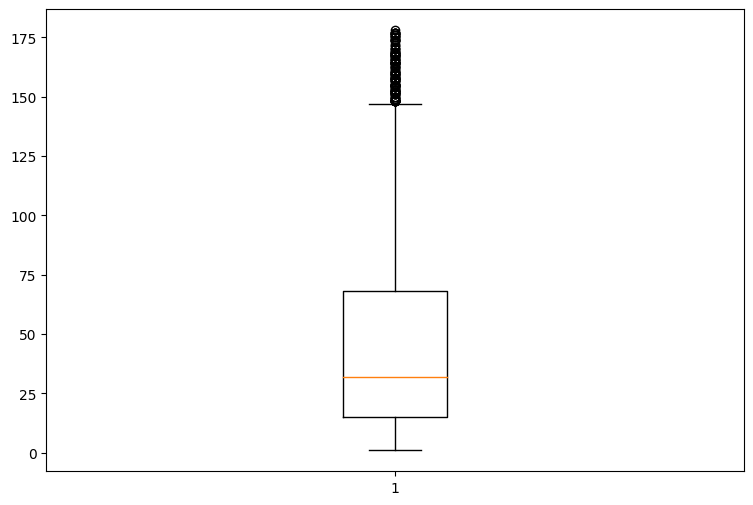

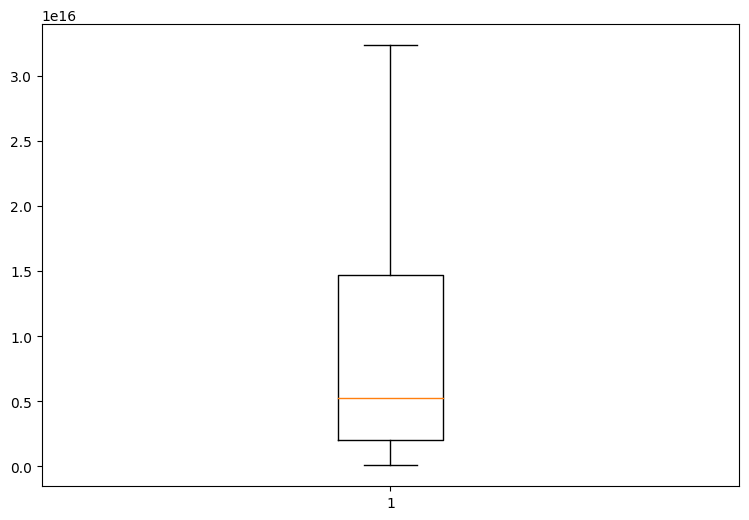

In [28]:
#Mô tả lại dữ liệu sau khi xử lý
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(RFM['TotalRevenue'])
fig = plt.figure(2, figsize=(9, 6))
plt.boxplot(RFM['Frequency'])
fig = plt.figure(3, figsize=(9, 6))
plt.boxplot(RFM['Recency'])

In [29]:
RFM.head()

,CustomerID,TotalRevenue,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
5,12352.0,1545.41,95,36 days 22:13:00


In [30]:
#Transform dữ liệu sau khi xử lý outlier
RFM_Clustering = RFM[['TotalRevenue', 'Frequency','Recency']]
RFM_Clustering['Recency'] = RFM_Clustering['Recency'].dt.days
scaler = StandardScaler()

RFM_Clustering_scaler = scaler.fit_transform(RFM_Clustering)

<ipython-input-30-5be2aa2b0bac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_Clustering['Recency'] = RFM_Clustering['Recency'].dt.days


In [31]:
RFM_Clustering_scaler.shape

(3697, 3)

In [32]:
RFM_Clustering_scaler = pd.DataFrame(RFM_Clustering_scaler)
RFM_Clustering_scaler.columns = ['TotalRevenue', 'Frequency','Recency']
RFM_Clustering_scaler.head()

,TotalRevenue,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

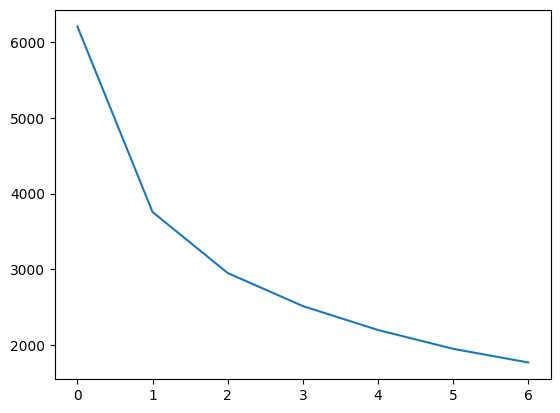

In [33]:
#Áp dụng K-Mean
#Tìm k
a = []
range_n_cluster = [2,3,4,5,6,7,8]
for i in range_n_cluster:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(RFM_Clustering_scaler)

    a.append(kmeans.inertia_)

plt.plot(a)

In [34]:
#Chọn k = 3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_Clustering_scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [35]:
RFM['ClusterID'] = kmeans.labels_
RFM.head()

,CustomerID,TotalRevenue,Frequency,Recency,ClusterID
0,12346.0,0.00,2,326 days 02:33:00,1
2,12348.0,1797.24,31,75 days 23:37:00,0
3,12349.0,1757.55,73,19 days 02:59:00,2
4,12350.0,334.40,17,310 days 20:49:00,1
5,12352.0,1545.41,95,36 days 22:13:00,2


<Axes: xlabel='ClusterID', ylabel='TotalRevenue'>

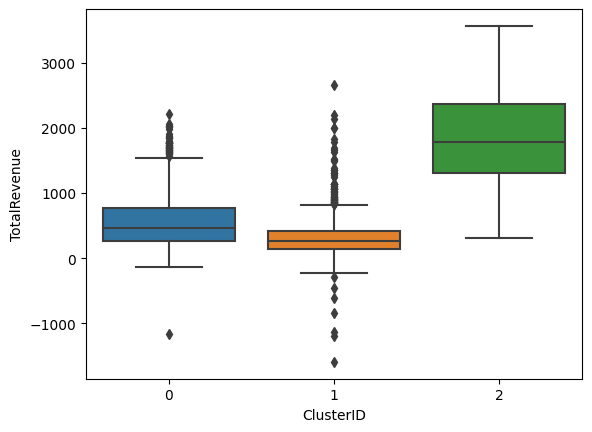

In [36]:
#Mô tả dữ liệu đã gán nhãn
sns.boxplot(x=RFM['ClusterID'], y= RFM['TotalRevenue'])

<Axes: xlabel='ClusterID', ylabel='Frequency'>

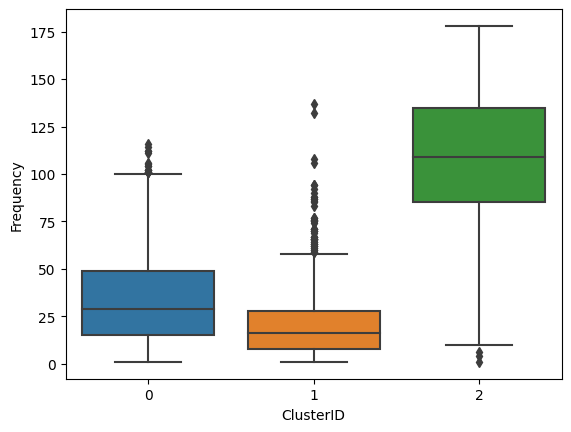

In [37]:
sns.boxplot(x = RFM['ClusterID'], y=RFM['Frequency'])

<Axes: xlabel='ClusterID', ylabel='Recency'>

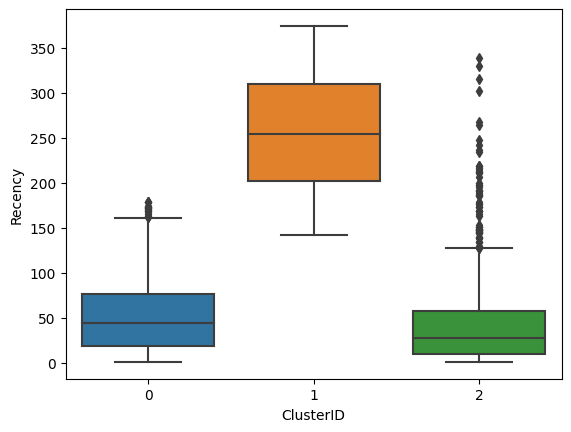

In [38]:
RFM['Recency'] = RFM['Recency'].dt.days
sns.boxplot(x = RFM['ClusterID'], y = RFM['Recency'])

In [ ]:
#Kết luận:
#1: Dựa vào 3 biểu đồ trên, ta thấy nhóm khác hàng có nhãn là 1 là khách hàng đem lại nhiều doanh thu cho công ty nhất với tần suất
#   mua hàng thường xuyên. Và mua hàng gần đây nhất. Chứng tỏ đây là khách hàng trung thành.
#2: Nhóm khách hàng có nhãn là 0 là khách hàng mà đem lại ít doanh thu cho công ty, tần suất mua hàng thấp, và lâu rồi chưa có quay
#   lại mua hàng cho công ty. Vậy đây là nhóm khách hàng ít trung thành.
#3: Nhóm khách hàng có nhãn là 2 là nhóm khách hàng mới mua hàng ở công ty, nên doanh thu và tần suất mua hàng của nhóm này chưa cao.
#   tuy nhiên, vì là khách hàng mới nên có thể ta cần chăm sóc tốt để họ trở thành những khách hàng tiềm năng